# 1. Limitations and Advantages of Neural Networks
### Limitations of single-layer neural networks:
- They can only represent a limited set of functions. If we have been training a model that uses complicated functions (which is the general case), then using a single layer neural network can lead to low accuracy in our prediction rate.
- They can only predict linearly separable data. If we have non-linear data, then training our single-layer neural network will lead to low accuracy in our prediction rate.
- Decision boundaries for single-layer neural networks must be in the hyperplane, which means that if our data distributes in 3 dimensions, then our decision boundary must be in 2 dimensions.
- To overcome such limitations, we use hidden layers in our neural networks.


### Advantages of single-layer neural networks:
- Single-layer neural networks are easy to set up.
- Single-layer neural networks take less time to train compared to a multi-layer neural network.
- Single-layer neural networks have explicit links to statistical models.
- The outputs in single layer neural networks are weighted sums of inputs. It means that we can interpret the output of a single layer neural network feasibly.

### Advantages of multilayer neural networks:
- They construct more extensive networks by considering layers of processing units.
- They can be used to classify non-linearly separable data.
- Multilayer neural networks are more reliable compared to single-layer neural networks.


# 2. How to select several neurons in a hidden layer?
- There are many methods for determining the correct number of neurons to use in the hidden layer. We will see a few of them here.
- The number of hidden nodes should be less than twice the size of the nodes in the input layer.
- For example: If we have 2 input nodes, then our hidden nodes should be less than 4.

# 3. The General Structure of an Artificial Neural Network (ANN):


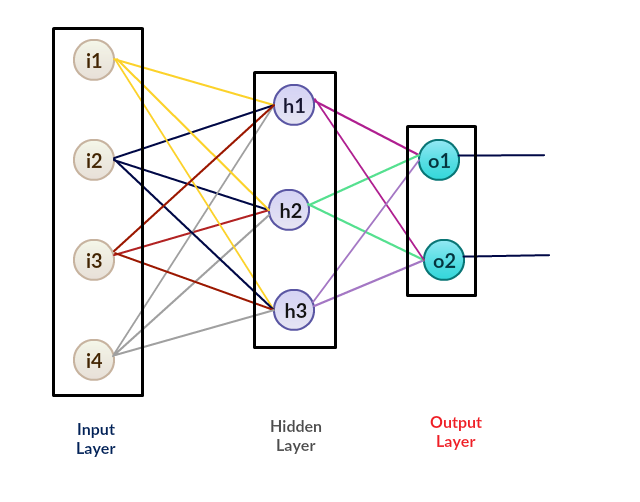

### Summarization of an artificial neural network:
- Take inputs.
- Add bias (if required).
- Assign random weights in the hidden layer and the output layer.
- Run the code for training.
- Find the error in prediction.
- Update the weight values of the hidden layer and output layer by gradient descent algorithm.
- Repeat the training phase with updated weights.
- Make predictions.

### Execution of multilayer neural networks:
- In the past tutorial , we saw that we had only 1 phase of execution there. In that phase, we find the updated weight values and rerun the code to achieve minimum error. 
- However, things are a little spicy here. The execution in a multilayer neural network takes place in two-phase. In phase-1, we update the values of weight_output (weight values for output layer), and in phase-2, we update the value of weight_hidden ( weight values for the hidden layer ). Phase-1 is similar to that of a neural network without any hidden layers.


### Execution in phase-1:
- To find the derivative, we are going to use in gradient descent algorithm to update the weight values. Here we are not going to derive the derivatives for those functions we already did in part -1 of neural network.
- In this phase, our goal is to find the weight values for the output layer. Here we are going to calculate the change in error concerning the change in output weight.

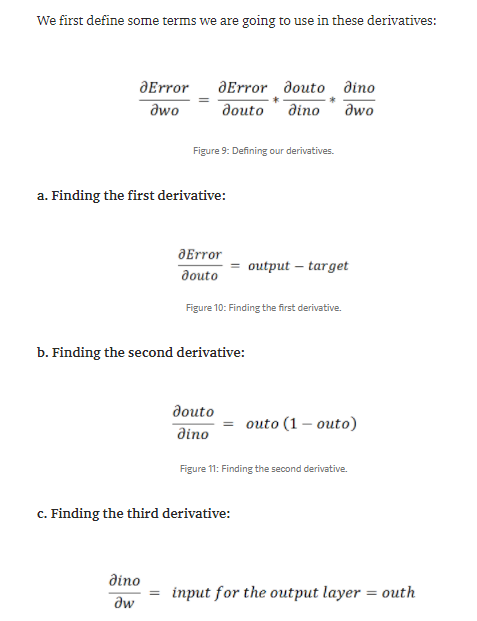

### Execution in phase-2:
- In phase-1, we find the updated weight for the output layer. In the second phase, we need to find the updated weights for the hidden layer. Hence, find how the change in hidden weight affects the change in error value.
- Represented as:

## Implementation in Python:
Below, we are going to implement our neural net with hidden layers step by step in Python, let’s code:
- a. Import required libraries:


In [57]:
# import required liabraries
import numpy as np 

- b. Define input features:

Next, we take input values for which we want to train our neural network. We can see that we have taken two input features. On tangible data sets, the value of input features is mostly high.

In [58]:
input_features = np.array([[0,0],[0,1],[1,0],[1,1]])
print(input_features.shape)
input_features

(4, 2)


array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

- c. Define target output values:

For the input features, we want to have a specific output for specific input features. It is called the target output. We are going to train the model that gives us the target output for our input features.


In [59]:
target_features = np.array([[0,1,1,1]])
target_output = target_features.reshape(4,1)
print(target_output.shape)
target_output

(4, 1)


array([[0],
       [1],
       [1],
       [1]])

- d. Assign random weights:

Next, we are going to assign random weights to the input features. Note that our model is going to modify these weight values to be optimal. At this point, we are taking these values randomly. Here we have two layers, so we have to assign weights for them separately.

The other variable is the learning rate. We are going to use the learning rate (LR) in a gradient descent algorithm to update the weight values. Generally, we keep LR as low as possible so that we can achieve a minimal error rate.

In [60]:
# Define Weights : 

#6 weights for 2 hidden layer (i.e 3 neurons(nodes) for 1 layer)
weight_hidden = np.array([[0.1,0.2,0.3],[0.4,0.5,0.6]])
weight_output = np.array([[0.7],[0.8],[0.9]])

#learning rate :
lr = 0.05

- e. Sigmoid function:

Once we have our weight values and input features, we are going to send it to the main function that predicts the output. 

Notice that our input features and weight values can be anything, but here we want to classify data, so we need the output between 0 and 1. For such output, we are going to use a sigmoid function.

In [61]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

- f. Sigmoid function derivative:

In a gradient descent algorithm, we need the derivative of the sigmoid function.

In [62]:
def sigmoid_der(x):
    return (sigmoid(x) * (1-sigmoid(x)))


- g. The main logic for predicting output and updating the weight values:

We are going to understand the following code step-by-step.


In [63]:

for epoch in range(200000):
    
    # Input for hidden layer :
    input_hidden = np.dot(input_features, weight_hidden)
 
    # Output from hidden layer :
    output_hidden = sigmoid(input_hidden)
 
    # Input for output layer :
    input_op = np.dot(output_hidden, weight_output)
 
    # Output from output layer :
    output_op = sigmoid(input_op)
    #==========================================================
    # Phase1
 
    # Calculating Mean Squared Error :
    error_out = ((1 / 2) * (np.power((output_op - target_output), 2)))
    print(error_out.sum())
 
    # Derivatives for phase 1 :
    derror_douto = output_op - target_output
    douto_dino = sigmoid_der(input_op) 
    dino_dwo = output_hidden
    derror_dwo = np.dot(dino_dwo.T, derror_douto * douto_dino)
    #===========================================================
    # Phase 2 
    # derror_w1 = derror_douth * douth_dinh * dinh_dw1
    # derror_douth = derror_dino * dino_outh
 
    # Derivatives for phase 2 :
    derror_dino = derror_douto * douto_dino
    dino_douth = weight_output
    derror_douth = np.dot(derror_dino , dino_douth.T)
    douth_dinh = sigmoid_der(input_hidden) 
    dinh_dwh = input_features
    derror_wh = np.dot(dinh_dwh.T, douth_dinh * derror_douth)
    # Update Weights
    weight_hidden -= lr * derror_wh
    weight_output -= lr * derror_dwo # TODO: Verify update from derror_wo to derror_dwo

# Final hidden layer weight values :
print("="*127)
print ("weight_hidden : ",weight_hidden)
# Final output layer weight values :
print ("weight_output : ",weight_output)
print("="*127)
# Predictions :

#Taking inputs :
single_point = np.array([0.5,2])
#1st step :
result1 = np.dot(single_point, weight_hidden) 
#2nd step :
result2 = sigmoid(result1)
#3rd step :
result3 = np.dot(result2,weight_output)
#4th step :
result4 = sigmoid(result3)
print(result4)
#=================================================


0.34794838215653723
0.34787480524749226
0.34780156431876424
0.3477286575181022
0.3476560829906563
0.3475838388792212
0.34751192332447833
0.3474403344652335
0.34736907043865545
0.34729812938050897
0.3472275094253868
0.3471572087069397
0.3470872253581017
0.3470175575113168
0.34694820329875803
0.3468791608525492
0.34681042830497943
0.34674200378871833
0.34667388543702704
0.346606071383967
0.34653855976460585
0.34647134871522095
0.3464044363735004
0.3463378208787406
0.3462715003720417
0.34620547299649995
0.34613973689739863
0.3460742902223938
0.34600913112169907
0.345944257748268
0.3458796682579721
0.3458153608097771
0.34575133356591686
0.34568758469206323
0.3456241123574941
0.3455609147352587
0.34549799000233966
0.3454353363398123
0.34537295193300177
0.34531083497163695
0.345248983650001
0.345187396167081
0.34512607072671236
0.34506500553772257
0.3450041988140712
0.34494364877498734
0.3448833536451038
0.34482331165459035
0.3447635210392816
0.34470398004080466
0.34464468690670247
0.3445856

In [64]:
print(result4)

[0.99473809]
